In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv("train.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [29]:
data = data.dropna()

In [30]:
data = data.drop(columns = ['Passengerid'])

In [31]:
data

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,39.0,108.9000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,38.5,7.2500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,28.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [32]:
data = data.dropna(subset=['Embarked'])


y = data['2urvived']
x = data.drop('2urvived', axis = 1)

In [33]:
import numpy as np
import numpy as np


print(x_train.isna().sum())



Age         0
Fare        0
Sex         0
sibsp       0
zero        0
zero.1      0
zero.2      0
zero.3      0
zero.4      0
zero.5      0
zero.6      0
Parch       0
zero.7      0
zero.8      0
zero.9      0
zero.10     0
zero.11     0
zero.12     0
zero.13     0
zero.14     0
Pclass      0
zero.15     0
zero.16     0
Embarked    0
zero.17     0
zero.18     0
dtype: int64


In [36]:
scaler = StandardScaler()
data = data.dropna()

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(class_weight='balanced')

model.fit(x_train_scaled, y_train)
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_test)
accuracy2 = accuracy_score(y_train, y_pred_train)
print(accuracy)
print(accuracy2)

0.7786259541984732
0.7089715536105032


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       277
           1       0.59      0.78      0.68       116

    accuracy                           0.78       393
   macro avg       0.75      0.78      0.75       393
weighted avg       0.81      0.78      0.79       393



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))

[[215  62]
 [ 25  91]]


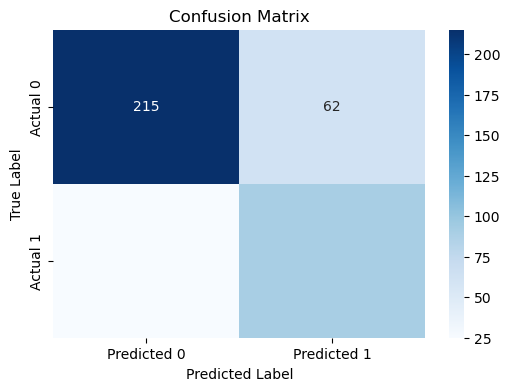

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


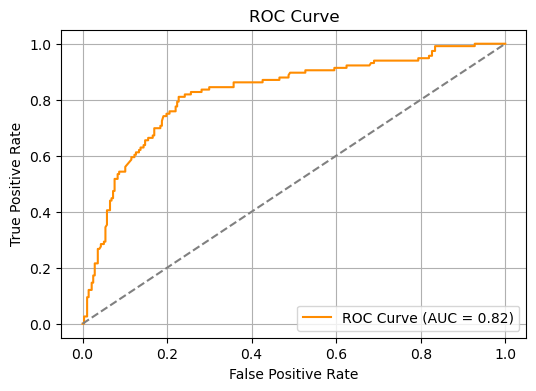

In [41]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(x_test_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
